In [23]:
import os

from datetime import datetime
import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

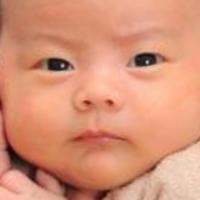

torch.Size([1, 3, 200, 200])


In [19]:
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])

sample = Image.open('face_age/001/1000.png')
sample = resize(sample)
sample_tensor = to_tensor(sample).unsqueeze(0)

display(sample)
print(sample_tensor.shape)

## Generating dataset with proper format

In [114]:
features_set = []
label_set = []
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])

for folder in os.listdir('face_age/'):
    try:
        for img in os.listdir(f'face_age/{folder}'):
            sample = Image.open(f'face_age/{folder}/{img}')
            sample = resize(sample)
            sample_tensor = to_tensor(sample)
            label_set.append(int(folder))
            features_set.append(sample_tensor)
    except:
        continue

In [115]:
features_set = torch.stack(features_set)

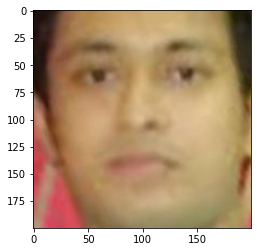

In [116]:
plt.imshow(features_set[10].permute(1, 2, 0))

In [125]:
label_set = torch.as_tensor(label_set)
label_set.shape
label_set[10]

tensor(24)

## Model

In [ ]:
class Model(nn.Module):
    